<a href="https://colab.research.google.com/github/jin9363/codestates_AI_18_-/blob/main/n213a_regularized_regression_ipynb%EC%9D%98_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 3*

# 📝 Assignment
---

# 🌱 **기본 과제**

이번에는 노트에서 다루지 않은 새로운 데이터인 [Melbourne Housing Market](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market#:~:text=calendar_view_week-,MELBOURNE_HOUSE_PRICES_LESS,-.csv)을 사용하여 정규화를 연습해 보겠습니다.

In [8]:
!pip install category_encoders
!pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 48.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


## **Part 1. 데이터 준비**

### **1-1. 데이터 불러오기 및 전처리**

- 데이터셋을 불러오세요.
- 다음 항목을 제거하세요.
  - column
    - 날짜 특성
    - 범주형 데이터 중에서 카디널리티가 50이 넘는 특성
  - row
    - Price 변수 기준 결측치 샘플
    - 중복되는 샘플 

#### **Q1. 다음 column 중 범주형 데이터가 아닌 것을 고르세요.**
```
A. Address 
B. Rooms 
C. SellerG 
D. Postcode 
E. CouncilArea 
```

**B**
**그나마 아닌거 같은거 고른거긴 한데 Rooms도 사실은 어느정도 범위에 있으니 범주형이 아닌가싶다..**

In [1]:
import pandas as pd

# get data
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/melbourne_house_prices/MELBOURNE_HOUSE_PRICES_LESS.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [3]:
# Date컬럼빼고 저장
df = df.loc[:, ~df.columns.isin(['Date'])]

# 결측치 제거(애초에 결측치가 Price데이터에만 있어서 df.dropna()로 제거)
df = df.dropna().reset_index(drop = True)

# 카디널리티가 인터넷에서는 상대적인거라고 하는데 여기서 의미하는건 대충 중복이 50개 넘으면 제거하라는거 같음
# 그래서 범주형데이터 일단 전부를 리스트로 만들어 변수에 저장해주고 for if문을 돌려서 각각 범주형 데이터가 50개가 넘으면 제거해주는식으로 진행
categorical_column = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Postcode', 'Regionname', 'CouncilArea']
for column in categorical_column:
    if df[column].nunique() > 50:
        df.drop(column, axis = 1, inplace = True)

# 중복 제거
df = df.drop_duplicates().reset_index(drop = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42515 entries, 0 to 42514
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          42515 non-null  int64  
 1   Type           42515 non-null  object 
 2   Price          42515 non-null  float64
 3   Method         42515 non-null  object 
 4   Regionname     42515 non-null  object 
 5   Propertycount  42515 non-null  int64  
 6   Distance       42515 non-null  float64
 7   CouncilArea    42515 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.6+ MB


### **1-2. Scaling & Encoding**
- 데이터 분리
  - 특성 X와 타겟 y를 지정하세요. 
  - `train_test_split()`을 사용하여 전체 데이터를 훈련과 테스트 데이터로 나누어주세요. 
    - 훈련과 테스트 데이터는 8:2의 비로 나눕니다.
    - `random_state=2`로 설정합니다. 
  - `train_test_split()`을 사용하여 훈련 데이터를 훈련과 검증 데이터로 나누어주세요.
    - 훈련과 검증 데이터는 8:2의 비로 나눕니다.
    - `random_state=2`로 설정합니다.
- 수치형 특성에 대해 **`StandardScaler()`**를 사용해서 **표준화**를 수행하세요.
- 범주형 특성에 대해 `category_encoders` 라이브러리의 **`OneHotEncoder()`**를 사용해서 원핫인코딩을 수행하세요.

##### **Q2. 범주형 특성에 원핫인코딩을 수행한 후, 열(column) 개수를 제출하세요.**

In [5]:
df.head()

,Rooms,Type,Price,Method,Regionname,Propertycount,Distance,CouncilArea
0,3,h,1490000.0,S,Northern Metropolitan,4019,3.0,Yarra City Council
1,3,h,1220000.0,S,Northern Metropolitan,4019,3.0,Yarra City Council
2,3,h,1420000.0,S,Northern Metropolitan,4019,3.0,Yarra City Council
3,3,h,1515000.0,S,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,2,h,670000.0,S,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [21]:
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import warnings
warnings.filterwarnings(action='ignore')

# 피쳐 타겟 분류
features = ['Rooms', 'Type', 'Method', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea']
target = 'Price'

# x, y 선언

x = df[features]
y = df[target]

# 훈련, 검증 테스트 분류
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 2)

# 수치형데이터 표준화(standardscaler 이용)

numeric_data = x_train.dtypes[x_train.dtypes != 'object'].index
scaler = StandardScaler()
x_train[numeric_data] = scaler.fit_transform(x_train[numeric_data])
x_val[numeric_data] = scaler.transform(x_val[numeric_data])
x_test[numeric_data] = scaler.transform(x_test[numeric_data])

# OneHotEncoding

ohe = OneHotEncoder()

x_train_ohe = ohe.fit_transform(x_train)
x_val_ohe = ohe.transform(x_val)
x_test_ohe = ohe.transform(x_test)

In [25]:
x_val_ohe.shape

(6803, 53)

## **Part 2. 정규화 모델**

- 기준모델
  - train set에 대해 평균을 사용하여 기준모델을 만드세요.
  - $R^2$와 MAE 값을 확인하세요.
- **`ols`** vs **`ridge`** vs **`lasso`**
  -  일반(다중) 회귀와 정규화 회귀 모델을 각각 아래와 같은 조건에서 만드세요. 
    - `LinearRegression()`
    - `Ridge()`
      - 적절한 alpha 값을 설정하세요.
    - `Lasso()`
      - 적절한 alpha 값을 설정하세요.
  - 각 모델의 $R^2$와 MAE 값을 확인하세요.
  - 각 모델의 회귀계수를 시각화로 나타내 보세요.

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 기준모델 생성
base = [y_train.mean()] * len(y_train)
base_r2 = r2_score(y_train, base)
base_mae = mean_absolute_error(y_train, base)

print(f'기준모델 r2 : {base_r2}\n기준모델 mae : {base_mae}')

기준모델 r2 : 0.0
기준모델 mae : 420382.30671549414


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeCV, LassoCV
import numpy as np

# 다중선형회귀모델 생성
ols = LinearRegression()
ols.fit(x_train_ohe, y_train)
# 시각화 만들기위한 회귀계수 시리즈생성
ols_coef = pd.Series(ols.coef_, x_train_ohe.columns)

# Ridge모델 생성
ridge = Ridge(alpha = 1.4)
ridge.fit(x_train_ohe, y_train)
# 시각화 만들기위한 회귀계수 시리즈생성
ridge_coef = pd.Series(ridge.coef_, x_train_ohe.columns)

# Lasso모델 생성
lasso = Lasso(alpha = 9.9)
lasso.fit(x_train_ohe, y_train)
# 시각화 만들기위한 회귀계수 시리즈생성
lasso_coef = pd.Series(lasso.coef_, x_train_ohe.columns)

In [81]:
y_train_pred = ols.predict(x_train_ohe)
ols_r2 = r2_score(y_train, y_train_pred)
ols_mae = mean_absolute_error(y_train, y_train_pred)

print(f'다중선형회귀 r2 : {ols_r2.round(2)}\n다중선형회귀 mae : {ols_mae.round(2)}')

다중선형회귀 r2 : 0.58
다중선형회귀 mae : 251432.72


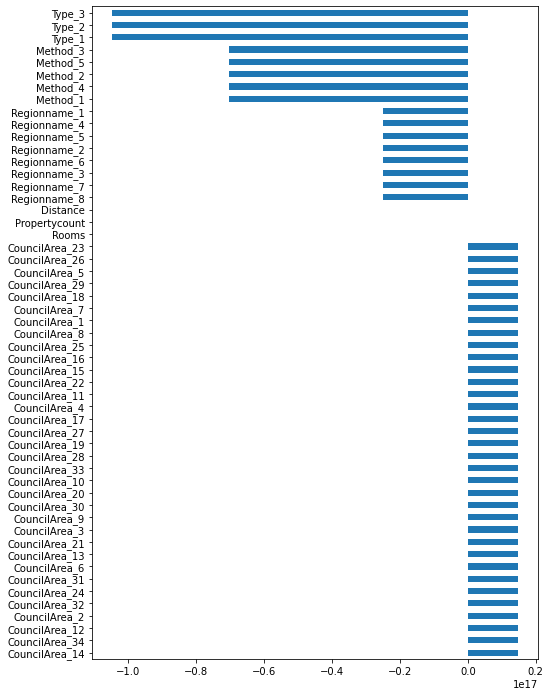

In [78]:
# 다중선형회귀모델 회귀계수 시각화 인데 뭔가 이상함
ols_coef.sort_values(ascending = False).plot.barh(figsize = (8, 12));

### **2-1. Ridge Regression**

##### **Q3. Ridge 회귀 모델에서 절댓값이 가장 큰 회귀계수 값은 얼마인가요? (소수점 이하 반올림)**

In [54]:
np.abs(ridge_coef).sort_values(ascending = False).round(0).head(5)

CouncilArea_14    494046.0
CouncilArea_12    459832.0
CouncilArea_2     451716.0
CouncilArea_23    419237.0
CouncilArea_32    388799.0
dtype: float64

In [82]:
y_ridge_train_pred = ridge.predict(x_train_ohe)
ridge_r2 = r2_score(y_train, y_ridge_train_pred)
ridge_mae = mean_absolute_error(y_train, y_ridge_train_pred)

print(f'Ridge r2 : {ridge_r2.round(2)}\nRidge mae : {ridge_mae}')

Ridge r2 : 0.58
Ridge mae : 251387.89568653906


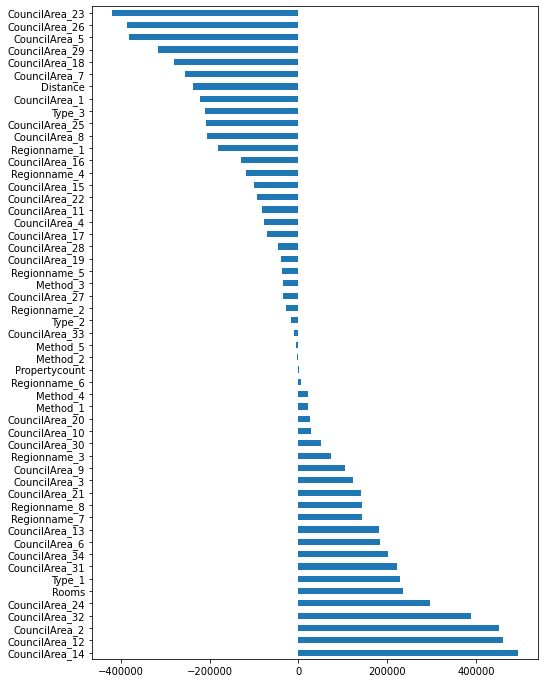

In [77]:
ridge_coef.sort_values(ascending = False).plot.barh(figsize = (8, 12));

### **2-2. Lasso Regression**

###### **Q4. Lasso 회귀 모델에서 회귀계수 값이 0으로 수렴한 특성은 모두 몇 개인가요?**

In [59]:
lasso_coef[lasso_coef == 0]

Method_2         -0.0
CouncilArea_19   -0.0
CouncilArea_27    0.0
CouncilArea_28   -0.0
CouncilArea_33    0.0
dtype: float64

In [83]:
y_lasso_train_pred = lasso.predict(x_train_ohe)
ridge_r2 = r2_score(y_train, y_lasso_train_pred)
ridge_mae = mean_absolute_error(y_train, y_lasso_train_pred)

print(f'lasso r2 : {ridge_r2.round(2)}\nlasso mae : {ridge_mae}')

lasso r2 : 0.58
lasso mae : 251392.48291292737


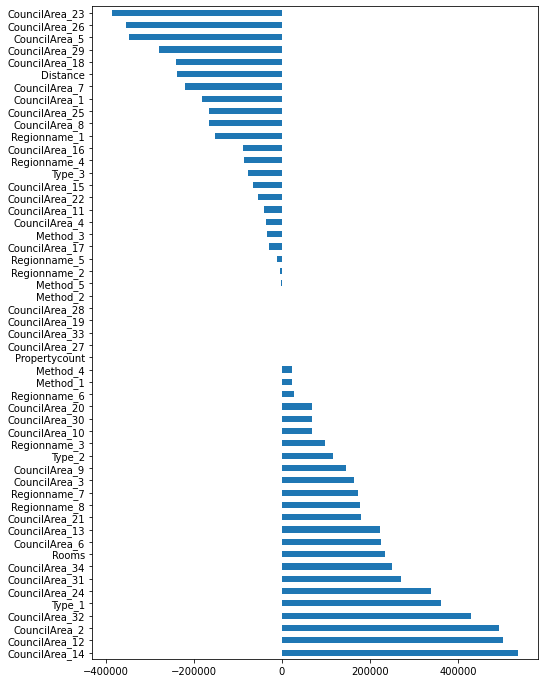

In [79]:
lasso_coef.sort_values(ascending = False).plot.barh(figsize = (8, 12));

### **2-3. 일반화 성능 검증**
-  학습한 정규화 모델 중 검증 세트의 **`MAE`**가 가장 낮은 모델을 선택하고 일반화 성능을 확인하세요.
  - 일반화 성능은 **`Test set`**를 한 번만 사용해서 확인합니다.
  - **$R^2$**와 **MAE** score를 확인합니다.

###### **Q5. 정규화 모델 중 검증 세트의 MAE가 가장 낮은 모델의 Test set에 대한 MAE score를 제출하세요. (소수점 이하 반올림)** 

In [88]:
y_ridge_test_pred = ridge.predict(x_test_ohe)
ridge_test_r2 = r2_score(y_test, y_ridge_test_pred)
ridge_test_mae = mean_absolute_error(y_test, y_ridge_test_pred)

print(f'ridge test r2 : {ridge_test_r2.round(2)}\nridge test mae : {ridge_test_mae.round(0)}')

ridge test r2 : 0.59
ridge test mae : 255414.0


In [90]:
print(f'기준모델 r2 : {base_r2}\n기준모델 mae : {base_mae.round(0)}')

기준모델 r2 : 0.0
기준모델 mae : 420382.0


##### **Q6. 최종모델은 기준모델보다 개선된 모델인가요? (test set에서의 $R^2$와 MAE를 기준모델과 비교해보세요.)**
```
A. test set에서의 R2가 기준모델보다 감소한 것을 보아 성능이 더 좋은 모델이다.
B. test set에서의 MAE가 기준모델보다 증가한 것을 보아 성능이 더 좋은 모델이다.
C. test set에서의 R2가 증가하고 MAE가 감소한 것을 보아 성능이 더 좋은 모델이다.
D. test set에서의 MAE와 R2가 기준모델보다 증가한 것을 보아 성능이 더 좋은 모델이다.
```

**C**

# 🥇 **도전 과제**

- RidgeCV와 LassoCV를 사용해서 최적의 알파값을 찾는 과정을 수행하고 성능을 개선해보세요.

- ElasticNet 정규화 모델에 대해서 추가로 학습해보세요. 

- Lasso 와 Ridge에 사용되는 L1, L2 정규화에 대해 알아보고 논의해보세요.
